# **Predicting Depression: Machine Learning Challenge**

## **Exploratory Data Analysis**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns    

In [2]:
from analysis_src.bivariate_analysis import *
from analysis_src.univariate_analysis import *
from analysis_src.multivariate_analysis  import SimpleMultivariateAnalysis
from analysis_src.missing_value_analysis import SimpleMissingValuesAnalysis

In [3]:
tran_data = pd.read_csv('../data/extracted_data/train.csv')
test_data = pd.read_csv('../data/extracted_data/test.csv')

### **Basic Data Inspection & Missing Values**

In [4]:
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   


Missing Values Count by Column:
Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Dietary Habits             4
Degree                     2
Financial Stress           4
dtype: int64

Visualizing Missing Values...


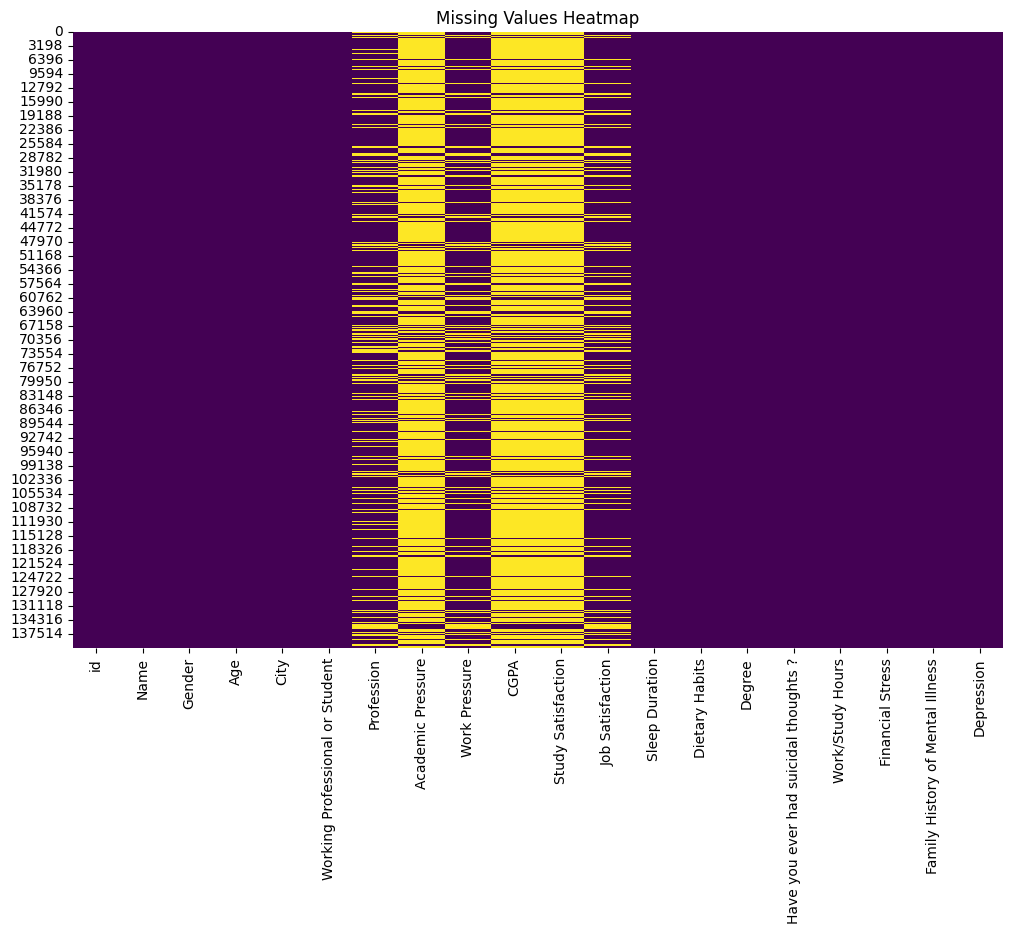

###############################################

Missing Values Count by Column:
Profession            24632
Academic Pressure     75033
Work Pressure         18778
CGPA                  75034
Study Satisfaction    75033
Job Satisfaction      18774
Dietary Habits            5
Degree                    2
dtype: int64

Visualizing Missing Values...


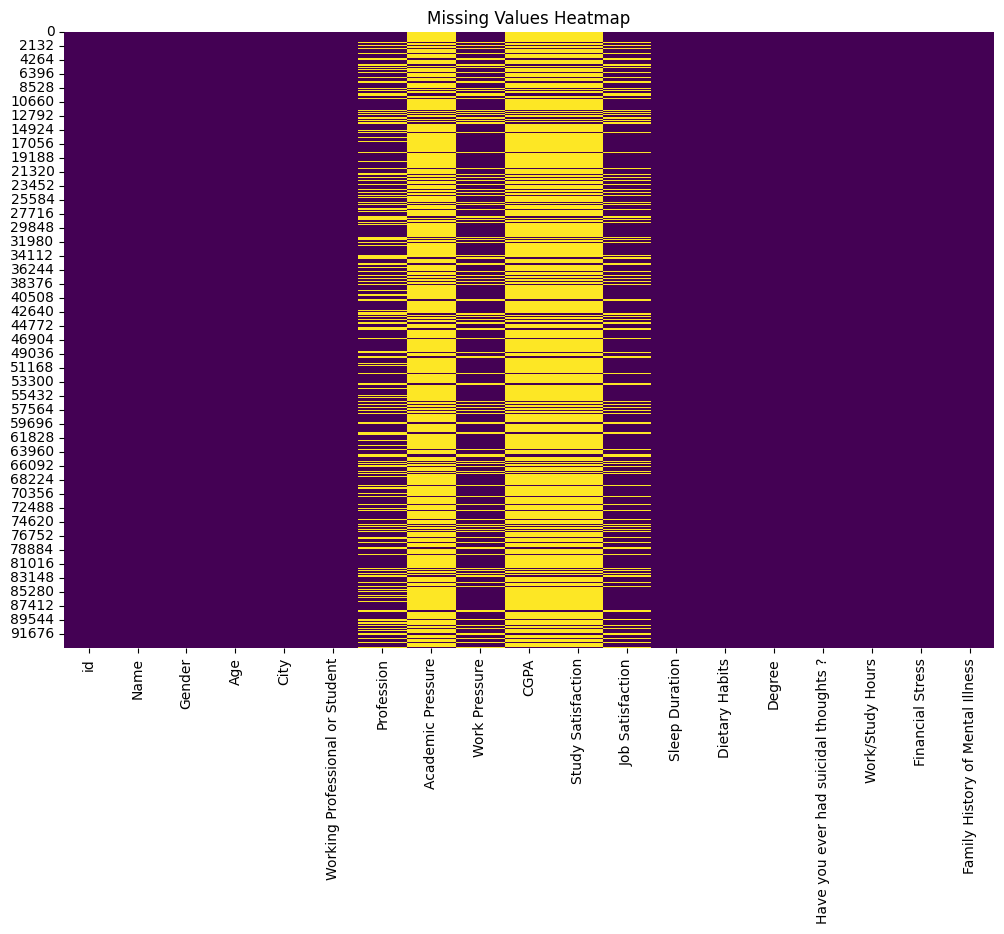

In [5]:
missing_value_analysis = SimpleMissingValuesAnalysis()
missing_value_analysis.analyze(tran_data)
print("###############################################")
missing_value_analysis.analyze(test_data)

**Note :**
- There are sme missing values in the columns `Profession`, `Academic Pressure`,`Work Pressure`,`CGPA`,`Study Satisfaction`,`Job Satisfaction`,`Dietary Habits`,`Degree`and `Financial Stress`

| Features           | count of Miss   |
|----------------------|---------|
| Profession          | 36630   |
| Academic Pressure   | 112803  |
| Work Pressure      | 27918   |
| CGPA               | 112802  |
| Study Satisfaction | 112803  |
| Job Satisfaction   | 27910   |
| Dietary Habits     | 4       |
| Degree             | 2       |
| Financial Stress   | 4       |


- For `Dietary Habits`,`Degree` and `Financial stress` we can remove the data rows of the missing values
- Other Threatments for the missing values depends on the destribution

In [6]:
tran_data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [7]:
tran_data.describe(include=['object'])

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,140700,140700,140700,140700,104070,140700,140696,140698,140700,140700
unique,422,2,98,2,64,36,23,115,2,2
top,Rohan,Male,Kalyan,Working Professional,Teacher,Less than 5 hours,Moderate,Class 12,No,No
freq,3178,77464,6591,112799,24906,38784,49705,14729,71138,70758


### **Univariate Analysis**

**Numerical Data**

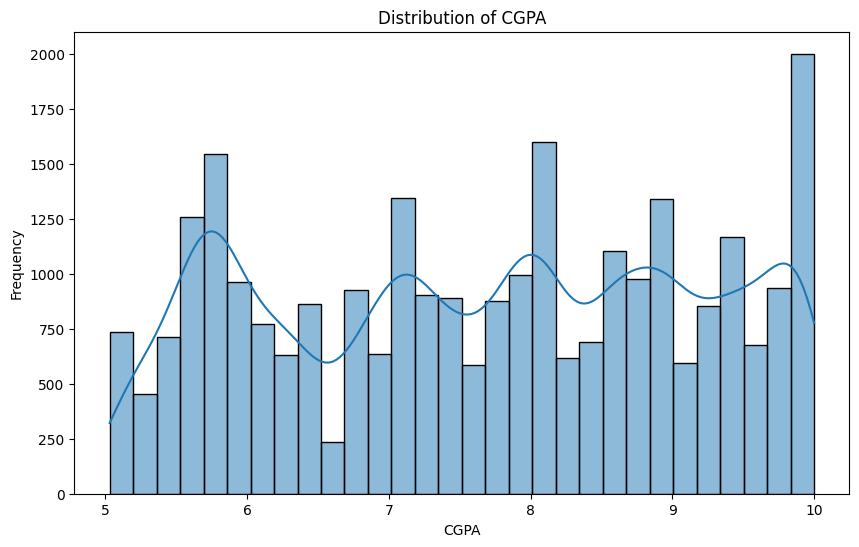

In [8]:
univariate_analyzer = UnivariateAnalysis(NumericalUnivariateAnalysis())
data_quntitative_drop = tran_data.drop(columns=['id','Name'])

univariate_analyzer.execute(data_quntitative_drop, 'CGPA')

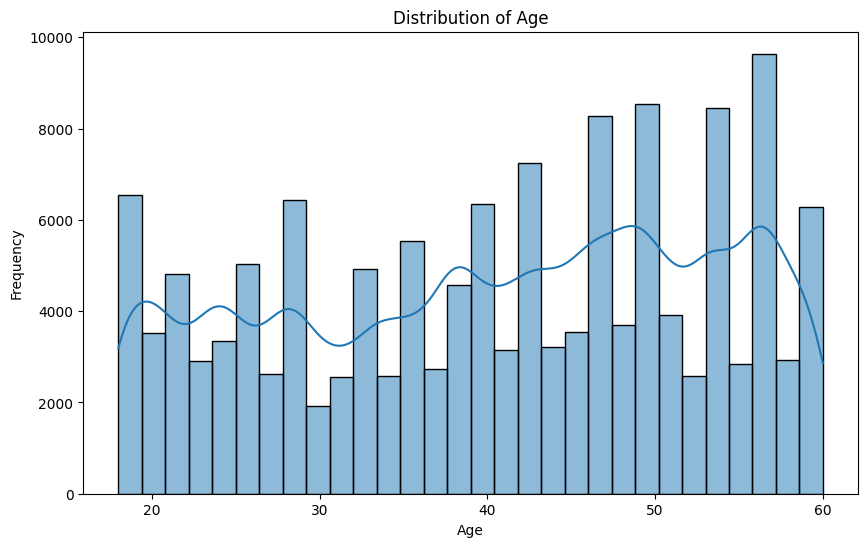

In [9]:
univariate_analyzer.execute(data_quntitative_drop, 'Age')

**Categorical Data**

c:\Users\npafe\Desktop\Machine Learning\Depression Prediction\analysis\analysis_src\univariate_analysis.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="muted")


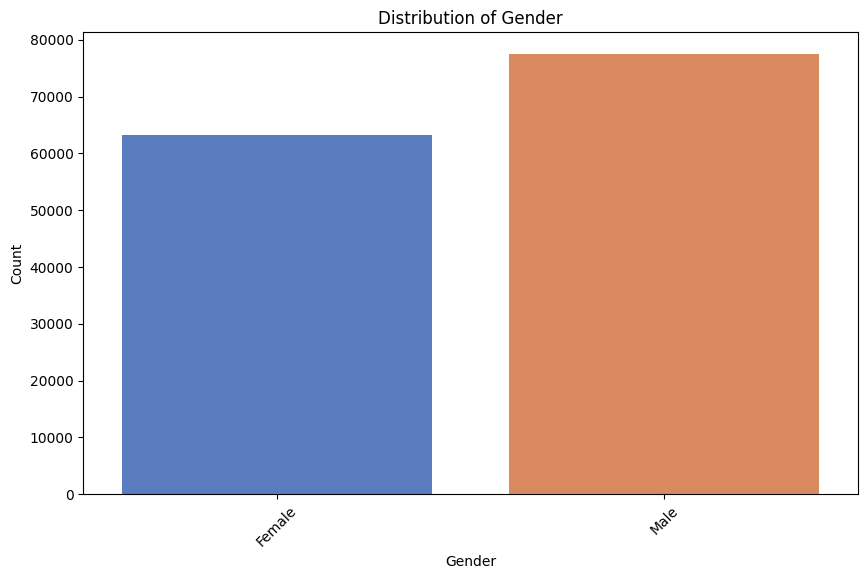

In [11]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
data_categorical_drop = tran_data.drop(columns=['id','Name'])

univariate_analyzer.execute(data_categorical_drop, 'Gender')

c:\Users\npafe\Desktop\Machine Learning\Depression Prediction\analysis\analysis_src\univariate_analysis.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="muted")


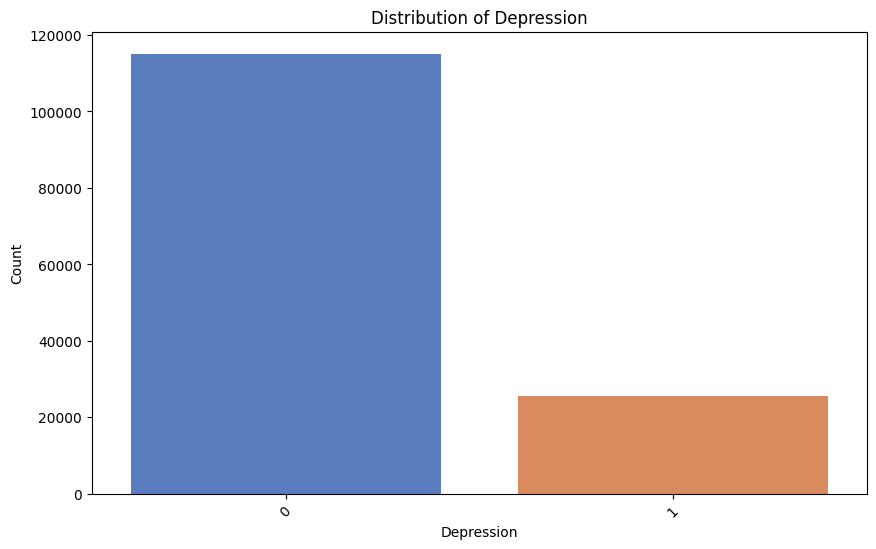

In [12]:
univariate_analyzer.execute(data_categorical_drop, 'Depression')

**Note:** Approcimately `80%` present of Data are Non-Depressed and only `20%` of Data are Depressed

c:\Users\npafe\Desktop\Machine Learning\Depression Prediction\analysis\analysis_src\univariate_analysis.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="muted")


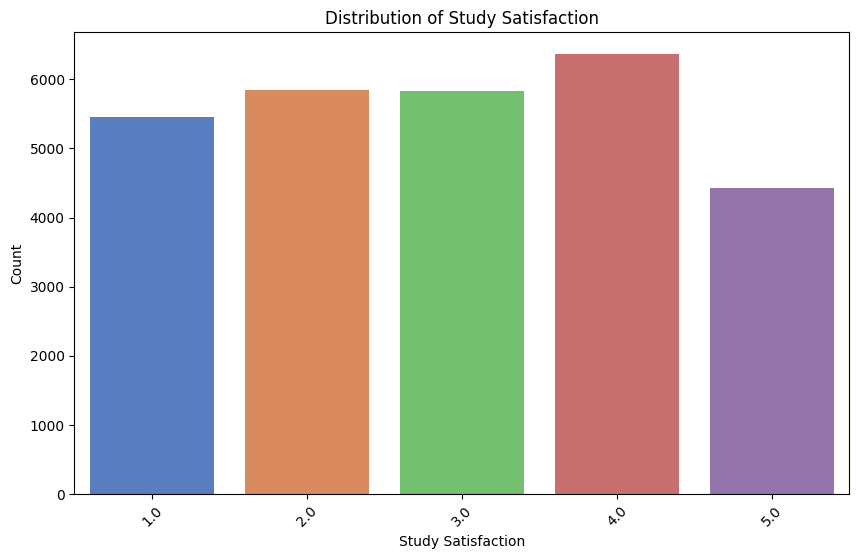

In [12]:
univariate_analyzer.execute(data_categorical_drop, 'Study Satisfaction')

### **Bivariate Analysis**

**Categorical-Numerical**

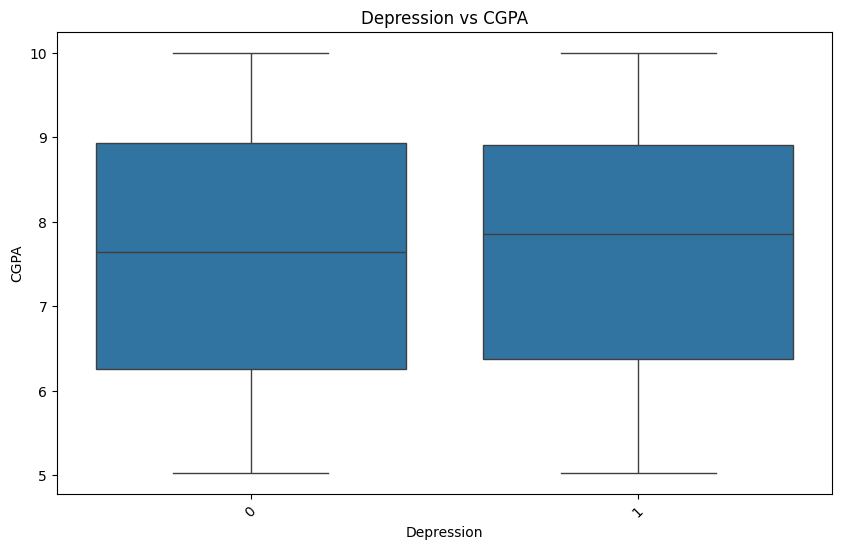

In [14]:
bivariate_analyzer = BivariateAnalysis(CategoricalNumericalBivariateAnalysis())



bivariate_analyzer.execute(tran_data, 'Depression',  'CGPA')

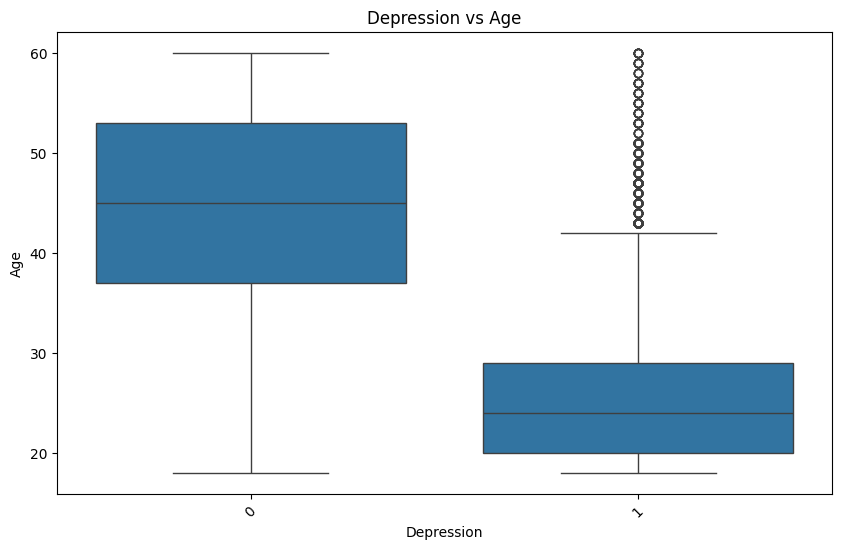

In [15]:
bivariate_analyzer.execute(tran_data, 'Depression',  'Age')

- There are some outliers in the Age column

**Categorical-Categorical**

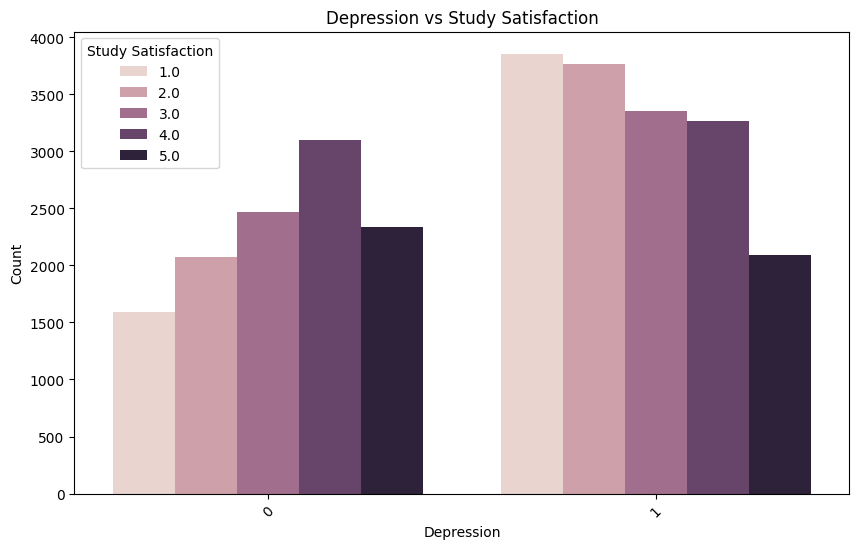

In [16]:
bivariate_analyzer.set_strategy(CategoricalCategoricalBivariateAnalysis())



bivariate_analyzer.execute(tran_data, 'Depression',  'Study Satisfaction')

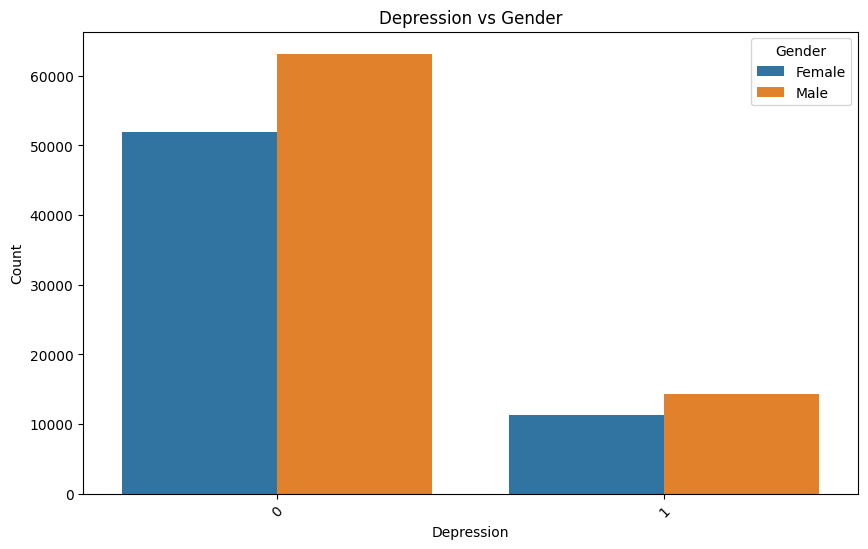

In [17]:
bivariate_analyzer.execute(tran_data, 'Depression',  'Gender')

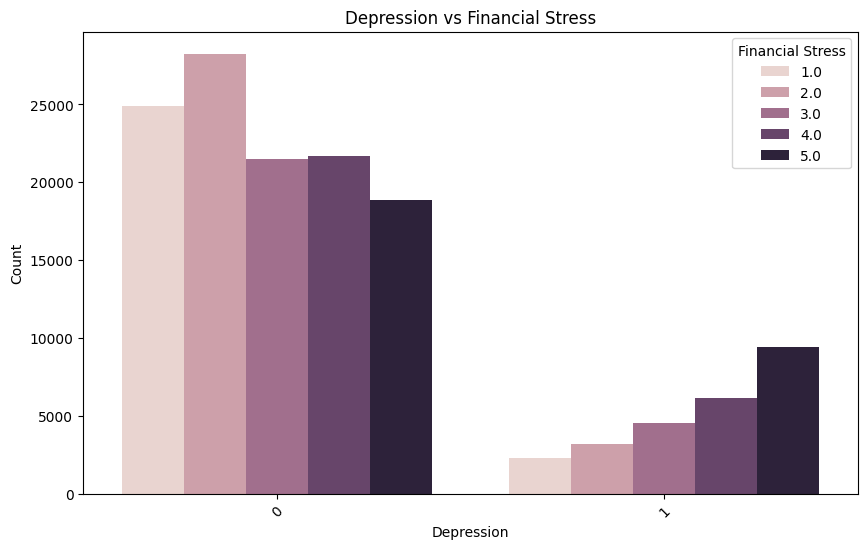

In [18]:
bivariate_analyzer.execute(tran_data, 'Depression',  'Financial Stress')

### **Multivariate Analysis**

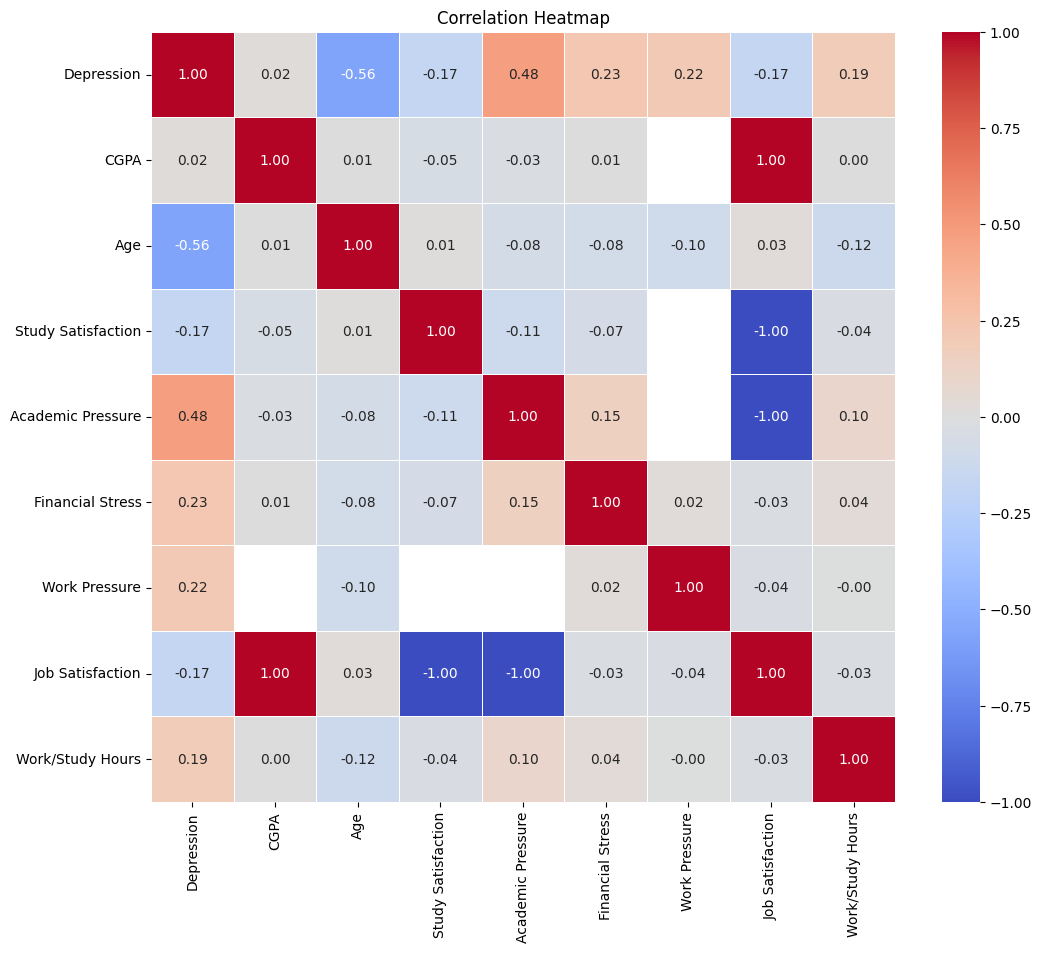

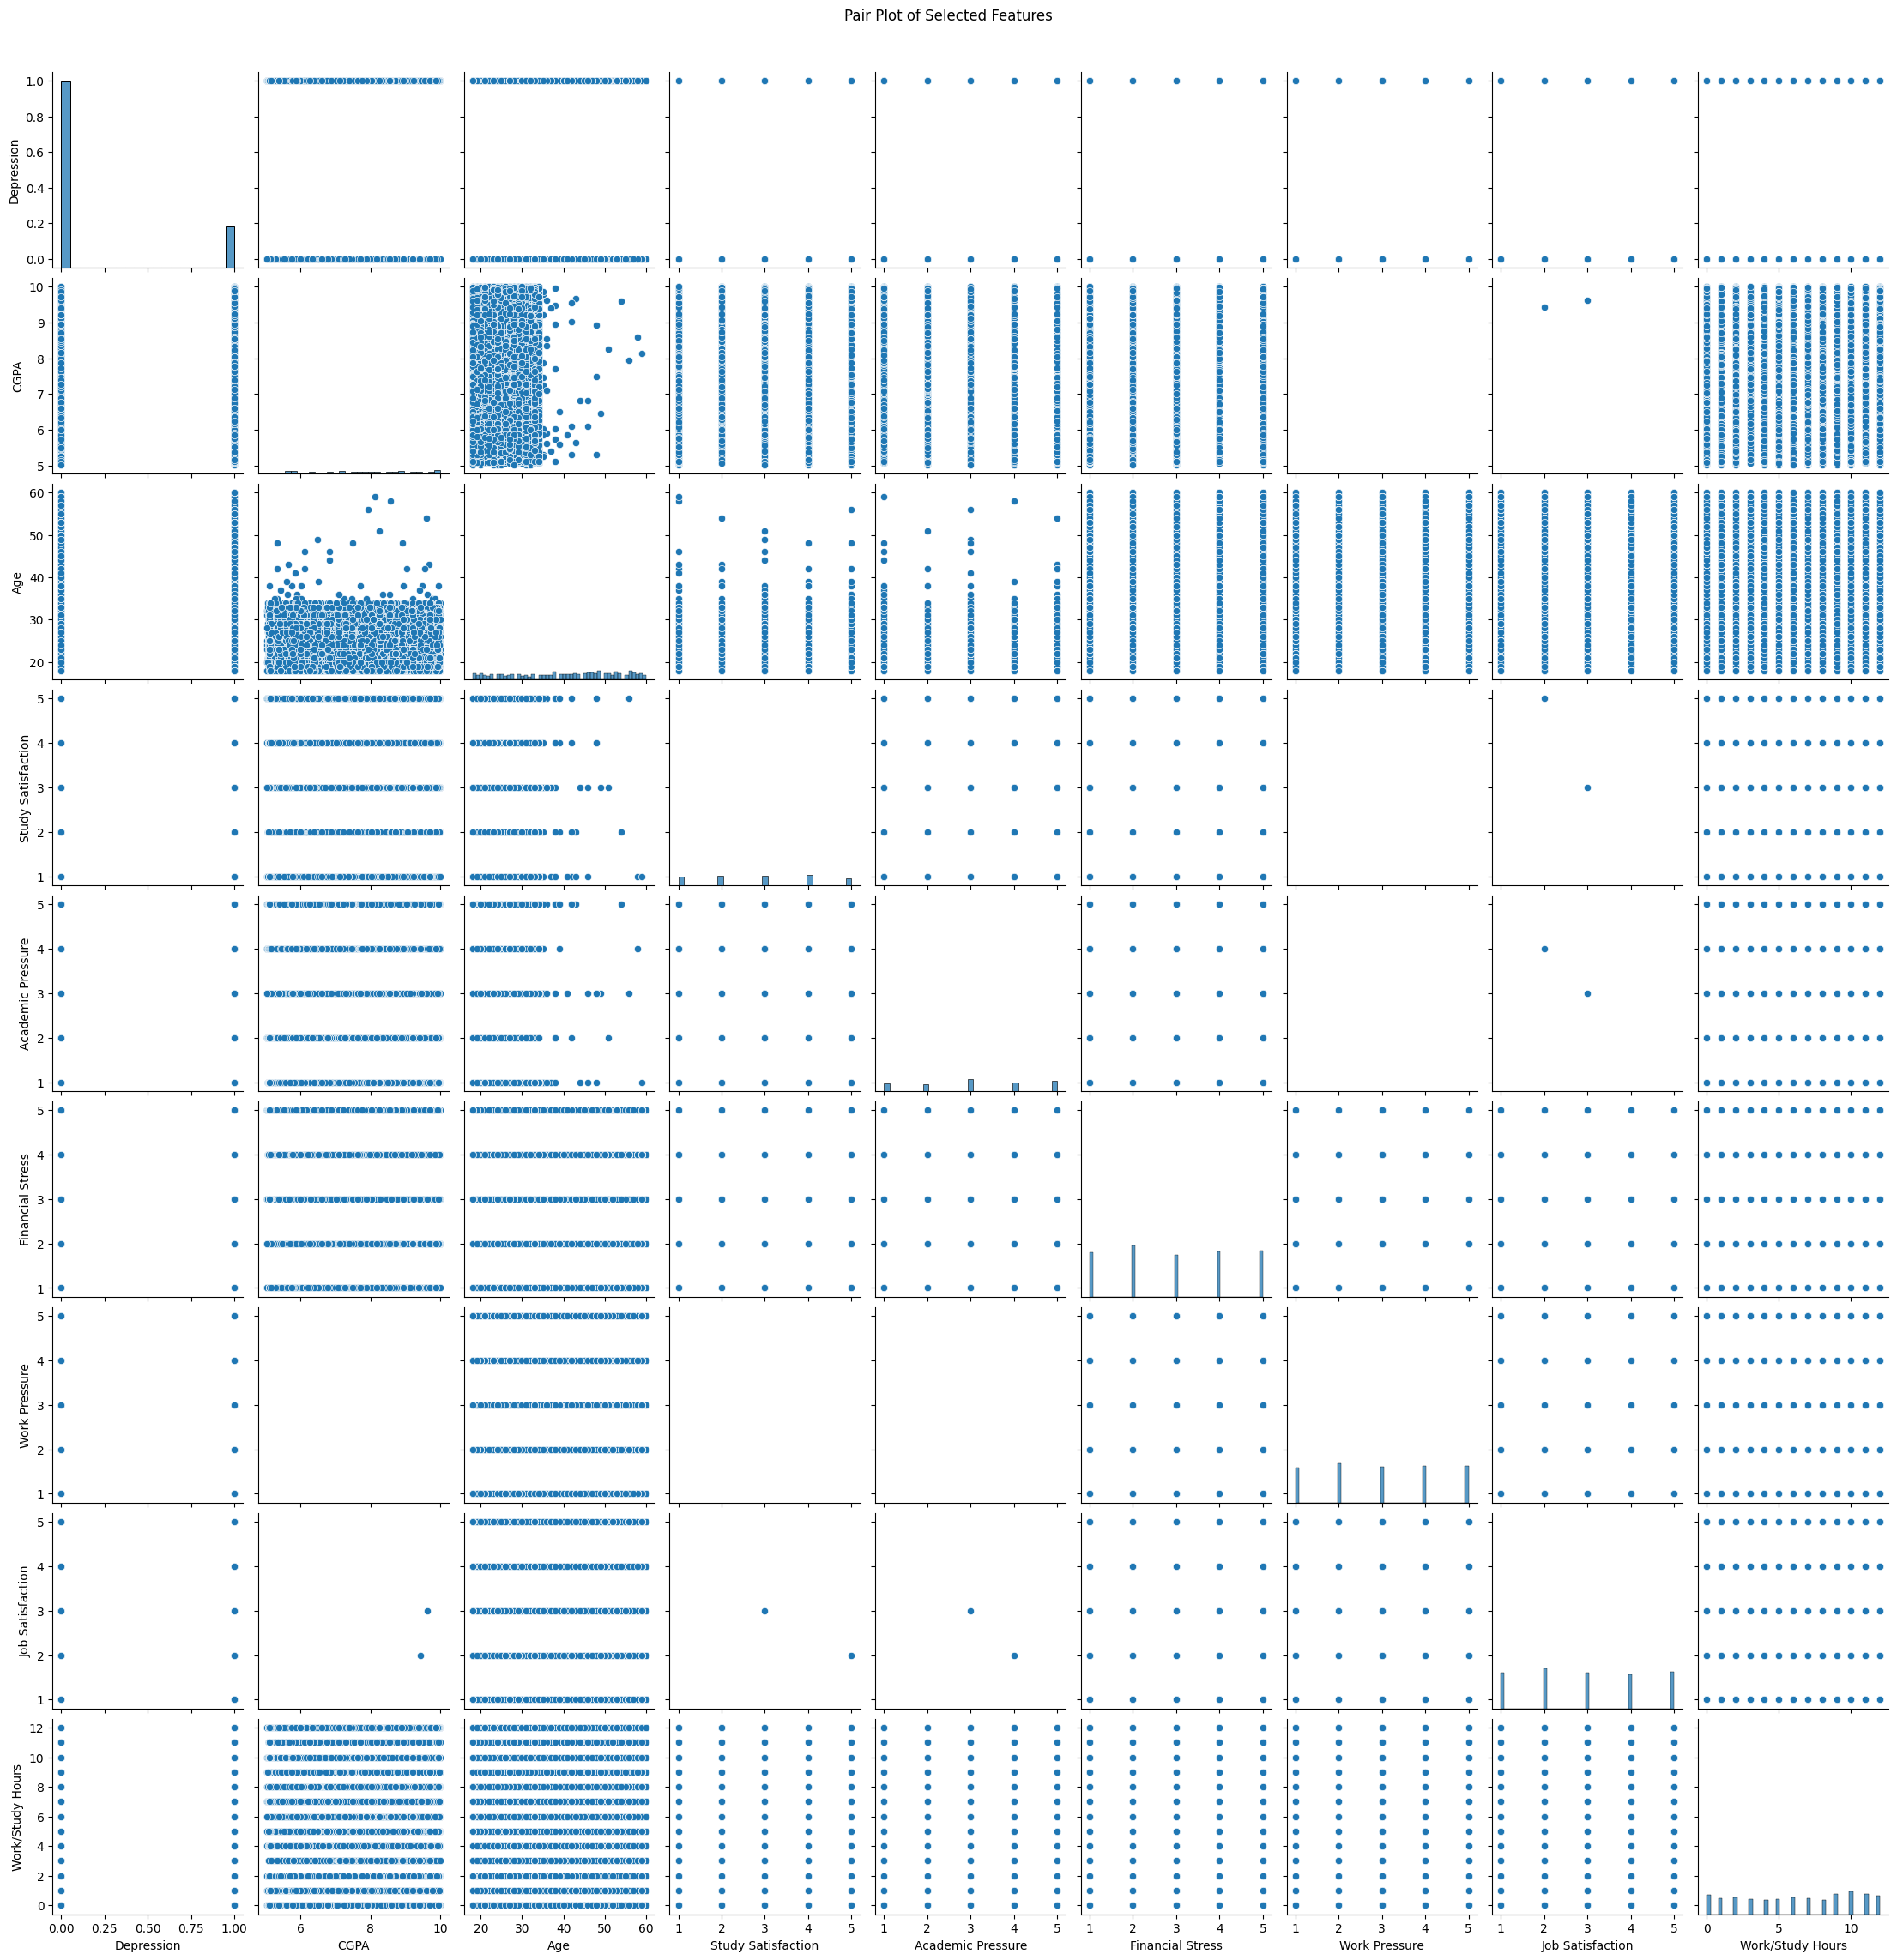

In [19]:
multivariate_analyzer = SimpleMultivariateAnalysis()


merged_df_drop = tran_data[['Depression', 'CGPA', 'Age', 'Study Satisfaction','Academic Pressure', 'Financial Stress', 'Work Pressure','Job Satisfaction','Work/Study Hours']]

multivariate_analyzer.analyze(merged_df_drop)

**Note:**
- Job Satisfaction and CGPA Highly Corelated with Each other `Possitive Correlation 1.0`

- Job Satisfation and Study Satisfaction are negatively highly correlated `-1.0`

- Acedamic Pressure and Job Pressure are negatively highly correlated `-1.0`

- When Age is increased Depression rate is decreased therefore most of the school age guys have more depression rate


**By Analyzing the data set the better solution is dataset devide into 2 parts based on Working Professional or Student It will to identify different patterns and can fill missing values efficiently**